In [1]:
from pathlib import Path
#import warnings
import scanpy as sc
import scib 
import numpy as np
import pandas as pd
import sys 

import scgpt as scg
import matplotlib.pyplot as plt

plt.style.context('default')
#warnings.simplefilter('ignore', ResourceWarning)
import warnings
warnings.filterwarnings('ignore', category=UserWarning)



pd.set_option('display.max_rows', 1000)



c:\Users\annel\anaconda3\envs\scgpt_py39\lib\site-packages\scgpt\model\model.py:21: UserWarning: flash_attn is not installed
  warnings.warn("flash_attn is not installed")
c:\Users\annel\anaconda3\envs\scgpt_py39\lib\site-packages\scgpt\model\multiomic_model.py:19: UserWarning: flash_attn is not installed
  warnings.warn("flash_attn is not installed")
c:\Users\annel\anaconda3\envs\scgpt_py39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pathlib import Path
print(Path.cwd())  # Check current working directory
print(list(Path.cwd().glob('*')))  # List all files in current directory

import sys
from pathlib import Path

repo_dir = Path.cwd().parent.absolute()
sys.path.append(str(repo_dir))

data_dir = repo_dir / "data"
print(f"repo_dir: {repo_dir}")
print(f"data_dir: {data_dir}") 
print(f"sys.path:")
for path in sys.path:
    print(f"  {path}")



c:\Users\annel\OneDrive\Documenten\Machine Learning\scGPT\notebooks
[WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/CellEmbed_1.ipynb'), WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/CellEmbed_Pancreas copy.ipynb'), WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/CellEmbed_Pancreas.ipynb'), WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/chunks'), WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/data'), WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/Dataloader copy.ipynb'), WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/Dataloader.ipynb'), WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/Dataloader.py'), WindowsPath('c:/Users/annel/OneDrive/Documenten/Machine Learning/scGPT/notebooks/Dataloader1.py'), WindowsPath('c:/Users/

In [26]:
import requests

dataset_RJ = "https://datasets.cellxgene.cziscience.com/10df7690-6d10-4029-a47e-0f071bb2df83.h5ad"
dataset_id = "10df7690-6d10-4029-a47e-0f071bb2df83"


file_path = data_dir / "1m_cells.h5ad"  # adjust this path as needed

if not file_path.exists():

    response = requests.get(dataset, stream=True)
    with open(file_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:  # filter out keep-alive chunks
                file.write(chunk)
    print (f"File downloaded: {file_path}")
else: 
    print(f"File already exists: {file_path}")


File already exists: c:\Users\annel\OneDrive\Documenten\Machine Learning\scGPT\data\1m_cells.h5ad


In [3]:
import importlib
import my_src.data_inspector
importlib.reload(my_src.data_inspector)
from my_src.data_inspector import DataInspector



In [ ]:
import scanpy as sc
import psutil
import numpy as np

# Set chunk size and initialize list to store chunks
CHUNK_SIZE = 5000  # Process 5000 cells at a time
chunks = []

# Get total number of cells from the file
with h5py.File(file_path, 'r') as f:
    total_cells = len(f['X']['indptr']) - 1
    print(f"Total cells in dataset: {total_cells}")

# Process data in chunks
for start_idx in range(0, total_cells, CHUNK_SIZE):
    end_idx = min(start_idx + CHUNK_SIZE, total_cells)
    print(f"\nProcessing chunk {start_idx//CHUNK_SIZE + 1}, cells {start_idx}-{end_idx}")
    
    try:
        # Load chunk using scanpy
        adata_chunk = sc.read_h5ad(
            file_path,
            backed='r',
            chunk_size=CHUNK_SIZE
        )[start_idx:end_idx].copy()
        
        chunks.append(adata_chunk)
        
        # Print memory usage
        process = psutil.Process()
        print(f"Memory usage: {process.memory_info().rss / 1024 / 1024:.2f} MB")
        
    except Exception as e:
        print(f"Error processing chunk {start_idx//CHUNK_SIZE + 1}: {str(e)}")
        continue

print(f"\nFinished processing {len(chunks)} chunks")



# Data inspection and analysis


In [19]:
# first inspection with h5py 
import h5py

with h5py.File(file_path, 'r') as f:
    # Look at the structure of the X group
    print("Contents of X group:", list(f['X'].keys()))
    
    # Look at obs and var to get dimensions
    print("\nContents of obs group:", list(f['obs'].keys()))
    print("Contents of var group:", list(f['var'].keys()))
    
    # If X contains a sparse matrix, it likely has 'data', 'indices', and 'indptr'
    if 'data' in f['X']:
        print("\nShape of X/data:", f['X']['data'].shape)
        print("Shape of X/indices:", f['X']['indices'].shape)
        print("Shape of X/indptr:", f['X']['indptr'].shape)
    
    total_cells = len(f['X']['indptr'])-1

print (total_cells)



Contents of X group: ['data', 'indices', 'indptr']

Contents of obs group: ['10X_run', '_index', '_scvi_batch', '_scvi_labels', 'ambient_removal', 'anatomical_position', 'assay', 'assay_ontology_term_id', 'broad_cell_class', 'cdna_plate', 'cdna_well', 'cell_type', 'cell_type_ontology_term_id', 'compartment', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_assay', 'donor_id', 'donor_method', 'donor_tissue', 'donor_tissue_assay', 'ethnicity_original', 'free_annotation', 'is_primary_data', 'library_plate', 'manually_annotated', 'method', 'n_genes_by_counts', 'notes', 'observation_joinid', 'organism', 'organism_ontology_term_id', 'pct_counts_ercc', 'pct_counts_mt', 'published_2022', 'replicate', 'sample_id', 'sample_number', 'scvi_leiden_donorassay_full', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_in_publication', 'tissue_ontology_term_id'

In [20]:
import numpy as np
import anndata as ad
from scipy import sparse
import h5py
import pandas as pd

def create_anndata_from_h5ad(file_path, start_row=0, n_rows=None):
    """
    Create an AnnData object from an h5ad file, loading a subset of rows if specified.
    """
    with h5py.File(file_path, 'r') as f:
        # First determine the total dimensions
        total_rows = len(f['X']['indptr']) - 1
        if n_rows is None:
            n_rows = total_rows - start_row
            
        # Get the original number of columns from the matrix shape
        n_cols = f['X'].attrs.get('shape')[1]  # Get the number of columns from matrix attributes

        # Get the sparse matrix data
        indptr = f['X']['indptr'][start_row:start_row + n_rows + 1]
        start_idx = indptr[0]
        end_idx = indptr[-1]
        data = f['X']['data'][start_idx:end_idx]
        indices = f['X']['indices'][start_idx:end_idx]
        indptr = indptr - start_idx
        X = sparse.csr_matrix((data, indices, indptr), shape=(n_rows, n_cols))

        # Load var (gene) metadata - now only load the first n_cols entries
        var = {}
        for key in f['var'].keys():
            if isinstance(f['var'][key], h5py.Dataset):
                data = f['var'][key][:n_cols]  # Only take the first n_cols entries
                if data.dtype.kind == 'S':  # bytes string
                    var[key] = [x.decode('utf-8') if isinstance(x, bytes) else x for x in data]
                else:
                    var[key] = data
            elif isinstance(f['var'][key], h5py.Group) and 'categories' in f['var'][key]:
                categories = f['var'][key]['categories'][:]
                if categories.dtype.kind == 'S':  # bytes string
                    categories = [x.decode('utf-8') if isinstance(x, bytes) else x for x in categories]
                codes = f['var'][key]['codes'][:n_cols]  # Only take the first n_cols entries
                var[key] = pd.Categorical.from_codes(codes, categories=categories)

        # Load obs (cell) metadata
        obs = {}
        for key in f['obs'].keys():
            if isinstance(f['obs'][key], h5py.Dataset):
                data = f['obs'][key][start_row:start_row + n_rows]
                if data.dtype.kind == 'S':  # bytes string
                    obs[key] = [x.decode('utf-8') if isinstance(x, bytes) else x for x in data]
                else:
                    obs[key] = data
            elif isinstance(f['obs'][key], h5py.Group) and 'categories' in f['obs'][key]:
                categories = f['obs'][key]['categories'][:]
                if categories.dtype.kind == 'S':  # bytes string
                    categories = [x.decode('utf-8') if isinstance(x, bytes) else x for x in categories]
                codes = f['obs'][key]['codes'][start_row:start_row + n_rows]
                obs[key] = pd.Categorical.from_codes(codes, categories=categories)

        # Convert metadata to pandas DataFrames
        var_df = pd.DataFrame(var)
        obs_df = pd.DataFrame(obs)

        # Create AnnData object
        adata = ad.AnnData(X=X, obs=obs_df, var=var_df)

        # Load uns (unstructured metadata) if needed
        if 'uns' in f:
            adata.uns = {}
            for key in f['uns'].keys():
                try:
                    adata.uns[key] = f['uns'][key][:]
                except:
                    continue

    return adata

# Example usage:
adata = create_anndata_from_h5ad(file_path, start_row=0, n_rows=1000)
print("AnnData shape:", adata.shape)
print("Available obs keys:", list(adata.obs.keys()))
print("Available var keys:", list(adata.var.keys()))

list_adata = []

for i in range(0, 100000,1000):
    print (i)
    adata = create_anndata_from_h5ad(file_path, start_row=i, n_rows=1000)
    list_adata.append(adata)

    #print (adata)




AnnData shape: (1000, 61759)
Available obs keys: ['10X_run', '_index', '_scvi_batch', '_scvi_labels', 'ambient_removal', 'anatomical_position', 'assay', 'assay_ontology_term_id', 'broad_cell_class', 'cdna_plate', 'cdna_well', 'cell_type', 'cell_type_ontology_term_id', 'compartment', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_assay', 'donor_id', 'donor_method', 'donor_tissue', 'donor_tissue_assay', 'ethnicity_original', 'free_annotation', 'is_primary_data', 'library_plate', 'manually_annotated', 'method', 'n_genes_by_counts', 'notes', 'observation_joinid', 'organism', 'organism_ontology_term_id', 'pct_counts_ercc', 'pct_counts_mt', 'published_2022', 'replicate', 'sample_id', 'sample_number', 'scvi_leiden_donorassay_full', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_in_publication', 'tissue_ontology_term_id', 'tissue_type', 'total_co

In [28]:
from tqdm import tqdm
import psutil
from time import time
import gc

def get_memory_usage():
    """Get current memory usage in GB"""
    process = psutil.Process()
    return process.memory_info().rss / 1024 / 1024 / 1024

def log_memory(message=""):
    """Log memory usage with optional message"""
    print(f"{message} - Memory usage: {get_memory_usage():.2f} GB")

def get_hvgs_from_h5(file_path, n_top_genes=2000):
    """Calculate HVGs directly from h5 file and return their indices"""
    log_memory("Starting HVG calculation")
    
    with h5py.File(file_path, 'r') as f:
        total_cells = len(f['X']['indptr']) - 1
        n_genes = f['X'].attrs['shape'][1]
        print(f"Processing data with {total_cells} cells and {n_genes} genes")

        # Calculate gene statistics in batches
        gene_sums = np.zeros(n_genes)
        gene_detected = np.zeros(n_genes)
        batch_size = 1000
        
        # Add progress bar for HVG calculation
        pbar = tqdm(range(0, total_cells, batch_size), desc="Calculating gene statistics")
        for start in pbar:
            end = min(start + batch_size, total_cells)
            indptr = f['X']['indptr'][start:end + 1]
            indices = f['X']['indices'][indptr[0]:indptr[-1]]
            data = f['X']['data'][indptr[0]:indptr[-1]]
            
            batch_matrix = sparse.csr_matrix(
                (data, indices, indptr - indptr[0]),
                shape=(end - start, n_genes)
            )
            
            gene_sums += np.array(batch_matrix.sum(axis=0)).flatten()
            gene_detected += np.array((batch_matrix > 0).sum(axis=0)).flatten()
            
            # Update progress bar with memory info
            pbar.set_postfix({'memory': f'{get_memory_usage():.2f}GB'})

        gene_means = gene_sums / total_cells
        gene_detection_rate = gene_detected / total_cells
        
        qualified_genes = (gene_detection_rate > 0.01) & (gene_means > 0.1)
        hvg_indices = np.where(qualified_genes)[0]
        
        if len(hvg_indices) > n_top_genes:
            hvg_indices = hvg_indices[np.argsort(gene_means[hvg_indices])[-n_top_genes:]]
        
        hvg_indices = np.array(hvg_indices, dtype=np.int64).ravel()
        
        print(f"Selected {len(hvg_indices)} highly variable genes")
        log_memory("Finished HVG calculation")
        return hvg_indices

def create_hvg_anndata_in_chunks(file_path, hvg_indices, chunk_size=1000, output_file=None):
    """Create one AnnData file with only HVG genes, processing in chunks"""
    log_memory("Starting chunk processing")
    hvg_indices = np.array(hvg_indices, dtype=np.int64).ravel()
    
    chunks = []
    with h5py.File(file_path, 'r') as f:
        total_cells = len(f['X']['indptr']) - 1
        print(f"Processing {total_cells} cells in chunks of {chunk_size}")
        
        # Add progress bar for chunks
        pbar = tqdm(range(0, total_cells, chunk_size), desc="Processing chunks")
        for start in pbar:
            end = min(start + chunk_size, total_cells)
            
            # Get chunk data
            indptr = f['X']['indptr'][start:end + 1]
            start_idx = indptr[0]
            end_idx = indptr[-1]
            data = f['X']['data'][start_idx:end_idx]
            indices = f['X']['indices'][start_idx:end_idx]
            
            # Create sparse matrix for chunk with only HVG columns
            X_chunk = sparse.csr_matrix(
                (data, indices, indptr - start_idx),
                shape=(end - start, f['X'].attrs['shape'][1])
            )
            X_chunk = X_chunk[:, hvg_indices]
            
            # Get cell metadata for chunk
            obs = {}
            for key in f['obs'].keys():
                if isinstance(f['obs'][key], h5py.Dataset):
                    data = f['obs'][key][start:end]
                    if data.dtype.kind == 'S':
                        data = [x.decode() if isinstance(x, bytes) else str(x) for x in data]
                    obs[key] = data
            
            # Create obs DataFrame and ensure no reserved column names
            obs_df = pd.DataFrame(obs)
            if '_index' in obs_df.columns:
                obs_df = obs_df.rename(columns={'_index': 'original_index'})
            
            # Create chunk AnnData
            chunk = ad.AnnData(
                X=X_chunk,
                obs=obs_df
            )
            chunks.append(chunk)
            
            # Clear memory
            del X_chunk
            gc.collect()
            
            # Update progress bar with memory info
            pbar.set_postfix({'memory': f'{get_memory_usage():.2f}GB'})
            
        log_memory("Getting gene metadata")
        # Get gene metadata (only once, for HVGs)
        var = {}
        for key in f['var'].keys():
            if isinstance(f['var'][key], h5py.Dataset):
                data = f['var'][key][:][hvg_indices]
                if data.dtype.kind == 'S':
                    data = [x.decode() if isinstance(x, bytes) else str(x) for x in data]
                var[key] = data
        
        # Create var DataFrame and ensure no reserved column names
        var_df = pd.DataFrame(var)
        if '_index' in var_df.columns:
            var_df = var_df.rename(columns={'_index': 'original_index'})
    
    # Concatenate chunks
    print("Concatenating chunks...")
    log_memory("Before concatenation")
    adata = ad.concat(chunks, axis=0)
    log_memory("After concatenation")
    
    # Add var annotations
    adata.var = var_df
    
    # Save if output file specified
    if output_file:
        print(f"Saving to {output_file}")
        adata.write_h5ad(output_file)
        log_memory("After saving")
    
    return adata

# Usage
output_file = "hvg_filtered.h5ad"

# Track total time
start_time = time()

# Get HVG indices
print("Starting HVG calculation...")
hvg_indices = get_hvgs_from_h5(file_path, n_top_genes=2000)
print(f"HVG calculation took {(time()-start_time)/60:.1f} minutes")

# Create AnnData with only HVGs
chunk_start = time()
adata_hvg = create_hvg_anndata_in_chunks(
    file_path, 
    hvg_indices, 
    chunk_size=1000,
    output_file=output_file
)

print(f"Chunking and processing took {(time()-chunk_start)/60:.1f} minutes")
print(f"Total time: {(time()-start_time)/60:.1f} minutes")
print(f"Final AnnData shape: {adata_hvg.shape}")
log_memory("Final memory usage")

Starting HVG calculation...
Starting HVG calculation - Memory usage: 1.00 GB
Processing data with 1136218 cells and 61759 genes


Calculating gene statistics: 100%|██████████| 1137/1137 [02:04<00:00,  9.12it/s, memory=0.89GB]


Selected 2000 highly variable genes
Finished HVG calculation - Memory usage: 0.89 GB
HVG calculation took 2.1 minutes
Starting chunk processing - Memory usage: 0.89 GB
Processing 1136218 cells in chunks of 1000


Processing chunks:  76%|███████▌  | 862/1137 [05:54<01:53,  2.43it/s, memory=4.39GB]


MemoryError: Unable to allocate 36.9 MiB for an array with shape (4832603,) and data type int64

In [70]:
#print (list_adata[0], list_adata[1])
#print (list_adata[0].shape, list_adata[1].shape)
#print (list_adata[0].obs.keys(), list_adata[1].obs.keys())
#print (list_adata[0].var.keys(), list_adata[1].var.keys())
print (list_adata[0].obs.head())
print (list_adata[1].obs.head())




  10X_run                                             _index _scvi_batch  \
0  b'nan'  b'TSP2_LymphNode_supradiaphragmatic_SS2_B11371...        b'4'   
1  b'nan'  b'TSP2_LymphNode_supradiaphragmatic_SS2_B11371...        b'4'   
2  b'nan'  b'TSP2_LymphNode_supradiaphragmatic_SS2_B11371...        b'4'   
3  b'nan'  b'TSP2_LymphNode_supradiaphragmatic_SS2_B11371...        b'4'   
4  b'nan'  b'TSP2_LymphNode_supradiaphragmatic_SS2_B11371...        b'4'   

   _scvi_labels ambient_removal    anatomical_position          assay  \
0             0         b'None'  b'SupraDiaphragmatic'  b'Smart-seq2'   
1             0         b'None'  b'SupraDiaphragmatic'  b'Smart-seq2'   
2             0         b'None'  b'SupraDiaphragmatic'  b'Smart-seq2'   
3             0         b'None'  b'SupraDiaphragmatic'  b'Smart-seq2'   
4             0         b'None'  b'SupraDiaphragmatic'  b'Smart-seq2'   

  assay_ontology_term_id            broad_cell_class  cdna_plate  ...  \
0         b'EFO:0008931'       

In [22]:
# Check number of donors
if 'donor_id' in adata.obs.columns:
    n_donors = adata.obs['donor_id'].nunique()
    print(f"\nNumber of unique donors: {n_donors}")
    print("\nDonor distribution:")
    print(adata.obs['donor_id'].value_counts())

elif 'batch' in adata.obs.columns:
    n_donors = adata.obs['batch'].nunique() 
    print(f"\nNumber of unique donors/batches: {n_donors}")
    print("\nDonor/batch distribution:")
    print(adata.obs['batch'].value_counts())
else:
    print("\nNo donor or batch information found in .obs columns")
    print("Available .obs columns:", list(adata.obs.columns))



Number of unique donors: 8

Donor distribution:
donor_id
G133    22237
G120    10824
G210     9376
G129     9141
G159     4266
G187     2880
G150     1650
G171     1151
Name: count, dtype: int64



Dataset Information:
Number of cells: 61525
Number of genes: 36406
Sparsity: 94.11%


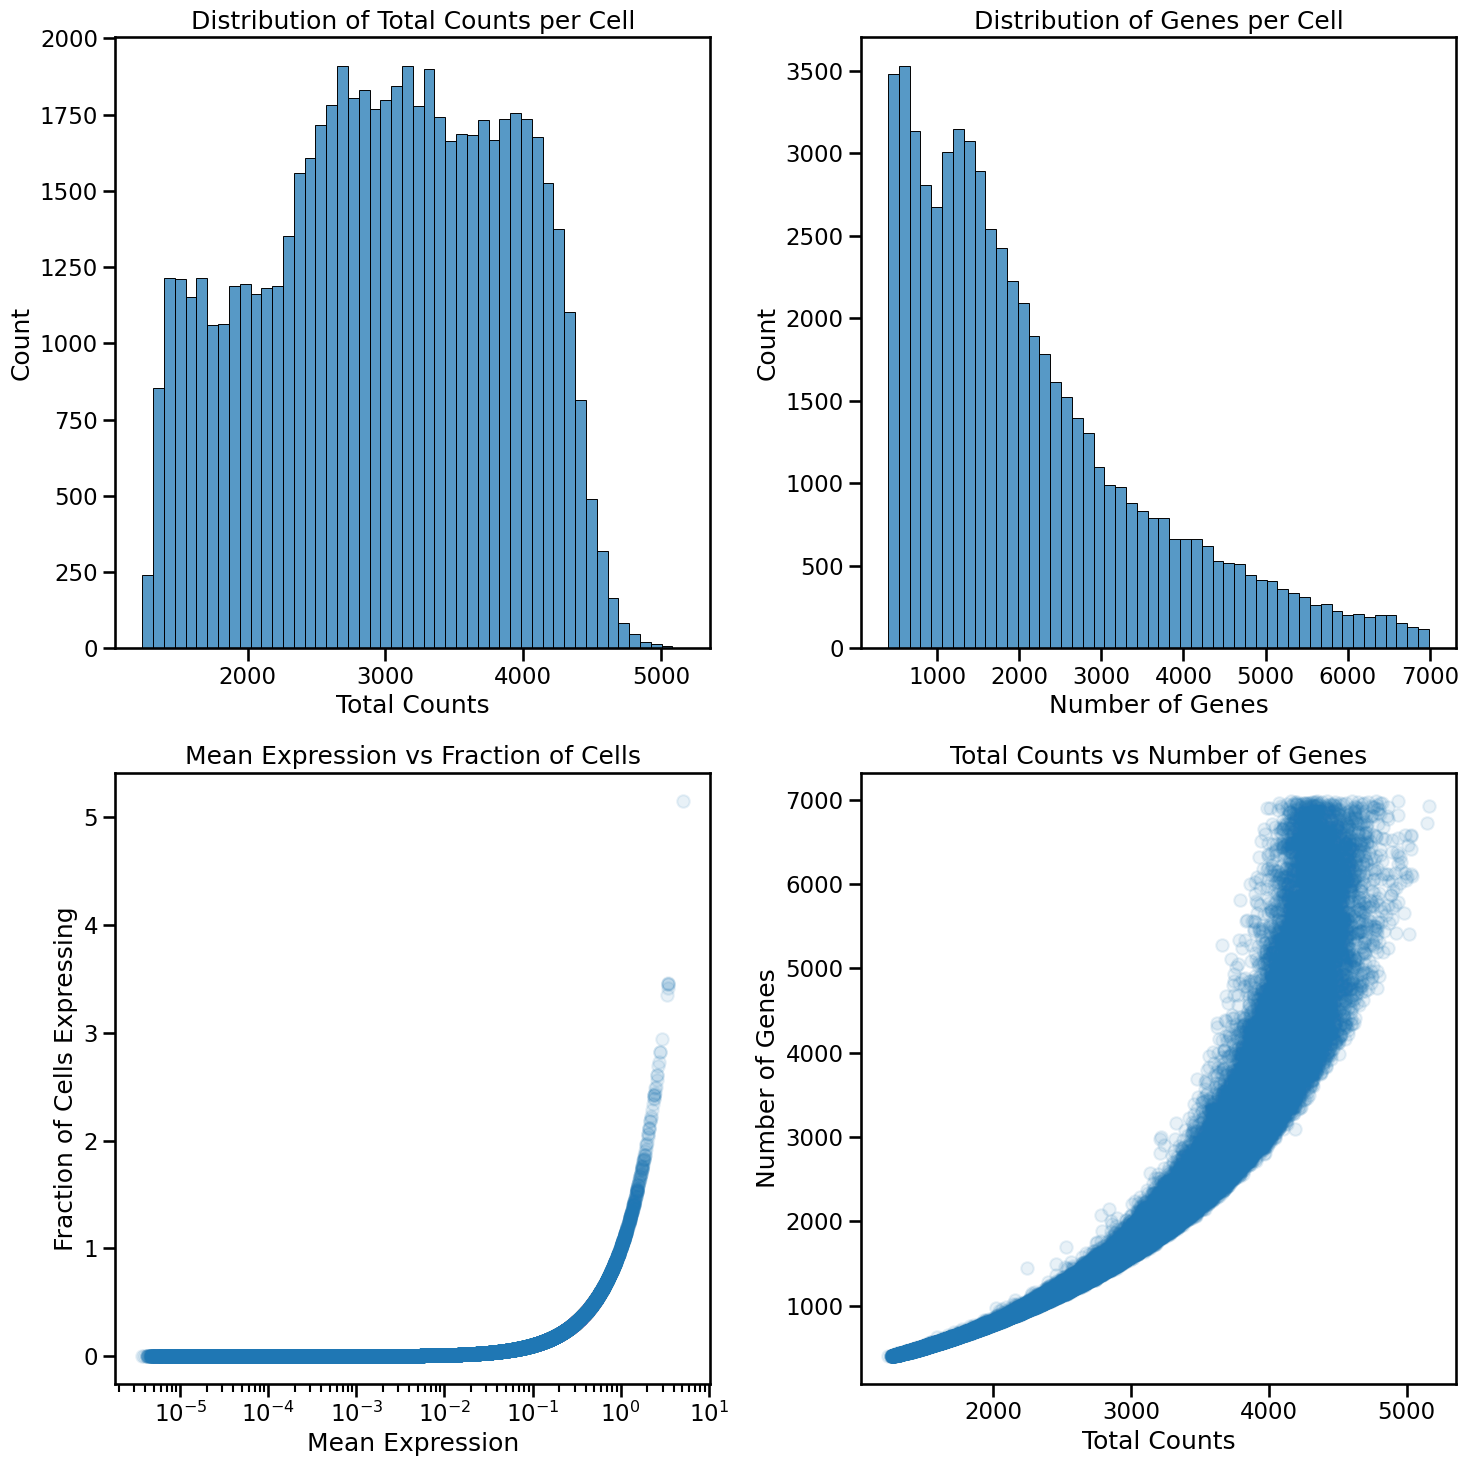

In [18]:
from my_inspector import AnnDataInspector
inspector = AnnDataInspector(adata)
    
# Get basic dataset info
info = inspector.basic_info()
print("\nDataset Information:")
print(f"Number of cells: {info['n_cells']}")
print(f"Number of genes: {info['n_genes']}")
print(f"Sparsity: {info['sparsity']['X']:.2%}")

# Check memory requirements
mem_check = inspector.check_need_chunking(available_memory_gb=16)
if mem_check['needs_chunking']:
    print(f"\nWarning: Dataset may need chunking. Recommended chunk size: {mem_check['recommended_chunk_size']}")

# Generate QC plots
inspector.plot_basic_qc()

# Data preprocessing 
- Decide which data to use for preprocessing
- Decide which genes to use for preprocessing
- Decide which cells to use for preprocessing
- Decide which batch to use for preprocessing
- Decide which layer to use for preprocessing
- Decide which method to use for preprocessing
- Create a hvg selection
- Normalize the data
- Log transform the data
- Bin the data
- Save the data





In [12]:
from my_preprocessor import Preprocessor

preprocessor = Preprocessor(
    use_key = "X",
    filter_gene_by_counts = 10,
    filter_cell_by_counts = 10,
    normalize_total = 1e4,
    result_normed_key = "X_normed",
    log1p = True,
    result_log1p_key = "X_log1p",
    subset_hvg = True, #calculate hvg 
    hvg_use_key = "X_log1p", #which layer to use for hvg selection
    hvg_flavor = "seurat_v3",
    hvg_subset = False,
    binning = 10,
    result_binned_key = "X_binned",
)

In [ ]:
adata_processed = preprocessor(adata, batch_key = "tech")



In [ ]:
print (adata_processed.layers["X_normed"])
print (adata_processed.layers["X_log1p"])
print (adata_processed.layers["X_binned"])
print (adata_processed.X)
print (adata_processed)








In [ ]:
#Example file for human pancreas data

import scanpy as sc
import scipy.sparse

from anndata._warnings import OldFormatWarning

# Suppress AnnData old format warnings
warnings.filterwarnings('ignore', category=OldFormatWarning)



def load_data(file_path, n_top_genes = 1800, hvg = True, show_info=True): 

    adata = sc.read_h5ad(file_path) 
    gene_col = "gene_name"
    cell_type_key = "celltype" #where the cell names are stored
    batch_key = "tech" #show from different methods 
    #N_HVG = 1800 #number of high variable genes 

    if hvg and 'highly_variable' not in adata.var.columns:
        sc.pp.highly_variable_genes(adata, n_top_genes = n_top_genes, flavor='seurat_v3')
        adata = adata[:, adata.var['highly_variable']]
    
    # Check if data is normalized and normalize if needed
    if adata.X.max() > 10:  # Simple heuristic to check if data needs normalization
        print("Data appears unnormalized. Performing normalization...")
        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)
    else:
        print("Data appears to be already normalized")

    if show_info:
        # Look at the structure and content
        print("AnnData object:", adata)
        print("\nShape:", adata.shape)  # (n_obs × n_vars)


        # Check if X is sparse
        print("\nX storage type:", type(adata.X))
        if scipy.sparse.issparse(adata.X):
            print("Sparse matrix details:")
            print('It is a sparse matrix')
            print("- data shape:", adata.X.data.shape)
            print("- indices shape:", adata.X.indices.shape)
            print("- indptr shape:", adata.X.indptr.shape)

        # Look at obs and var contents
        print("\nContents of obs:", adata.obs.columns.tolist())
        print("\nContents of var:", adata.var.columns.tolist())

        # print some metadata
        print("\nMetadata:")
        print(adata.uns)
        print("\nLayers:")
        print(adata.layers)
    


    #save function 

    return adata



example_adata = load_data(file_path, n_top_genes = 1800, hvg = True, show_info=False)



In [ ]:
import os 

def save_adata(adata, file_path, hvg = True):
    if hvg and 'highly_variable' in adata.var.columns:
        print("Saving HVG data")
        adata_hvg= adata[:, adata.var['highly_variable']]
        save_dir = os.path.join(os.path.dirname(file_path), 'save')
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        base_name = os.path.basename(file_path)
        new_name = base_name.replace('.h5ad', '_hvg.h5ad')
        file_path = os.path.join(save_dir, new_name)
        adata_hvg.write_h5ad(file_path)
    else:
        adata.write_h5ad(file_path)




save_adata(example_adata, file_path)
